HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом. Первая — построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. 
Ваша вторая задача — построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

Ход исследования:

- Загрузка данных.
- Предобработка данных.
- Исследовательский анализ данных.
- Подготовка Данных.
- Обучение моделей.
- Написание вывода.

In [2]:
!pip install -U scikit-learn

In [3]:
!pip install phik

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import phik

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression 

from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import (OneHotEncoder, OrdinalEncoder, StandardScaler, 
                                   MinMaxScaler, OrdinalEncoder, LabelEncoder)

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             roc_auc_score, r2_score, roc_curve, RocCurveDisplay, make_scorer,
                            mean_absolute_error, mean_squared_error, r2_score)
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import confusion_matrix, mean_squared_error, mean_absolute_error, fbeta_score, make_scorer

In [5]:
#список имен датафреймов 
DF_NAMES = ['train_job_satisfaction', 'test_features', 'test_target_job_satisfaction']
DF_NAMES_2 = ['train_quit', 'test_target_quit']
NL = '\n'

RANDOM_STATE = 42

# Задача 1: предсказание уровня удовлетворённости сотрудника

##  Шаг 1. Загрузка данных

In [6]:
#Тренировочная выборка
train_job_satisfaction = pd.read_csv('/datasets/train_job_satisfaction_rate.csv')

In [7]:
train_job_satisfaction.head(10)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20
5,405448,hr,middle,low,7,no,no,4,30000,0.78
6,857135,sales,sinior,medium,9,no,no,3,56400,0.56
7,400657,purchasing,middle,high,9,no,no,3,52800,0.44
8,198846,hr,junior,low,1,no,no,2,13200,0.14
9,149797,technology,middle,high,6,no,no,3,54000,0.47


In [8]:
train_job_satisfaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


In [9]:
#Входные признаки тестовой выборки
test_features = pd.read_csv('/datasets/test_features.csv')

In [10]:
test_features.head(10)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800
5,429973,purchasing,middle,medium,6,no,no,3,42000
6,850699,technology,junior,medium,3,no,no,3,26400
7,500791,sales,middle,high,9,no,no,4,49200
8,767867,marketing,middle,high,3,no,yes,4,62400
9,937235,sales,junior,medium,1,no,yes,3,26400


In [11]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


In [12]:
#Целевой признак тестовой выборки
test_target_job_satisfaction = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')

In [13]:
test_target_job_satisfaction.head(10)

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08
5,817219,0.76
6,269033,0.64
7,962356,0.38
8,649052,0.14
9,532834,0.59


In [14]:
test_target_job_satisfaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


**Промежуточный Вывод**

Датасет train_job_satisfaction_df содержит 4000 записей и 9 переменных. Столбцы dept и level имеют пропуски, которые необходимо обработать. Данная выборка является тренировочной - (X_train)

Датасет test_features_df содержит 2000 записей и 8 признаков. Столбцы dept и level имеют пропуски, которые необходимо обработать. Данная выборка содержит в себе входные признаки тестовой выборки.(X_test)

Датасет test_target_job_satisfaction_df содержит 2000 записей . Датасет признак целевой переменной тестовой выборки(y_true)

## Шаг 2. Предобработка данных

Обработаем пропуски в пайплайне

Проверим наличие дупликатов 

In [15]:
train_job_satisfaction.duplicated().sum()

0

In [16]:
test_features.duplicated().sum()

0

In [17]:
test_target_job_satisfaction.duplicated().sum()

0

In [18]:
#список столбцов с категориальными признаками
for f in DF_NAMES:
    print(f'Столбцы датафрейма {f}')
    globals()['col_cat_'] = globals()[f].select_dtypes(include='object').columns.to_list()
    globals()['col_num_'] = [x for x in globals()[f].columns.to_list() if x not in globals()['col_cat_']]
    print(f"Категориальные столбцы: \n {globals()['col_cat_']}\n"
          f"Численные столбцы: \n {globals()['col_num_']} \n")

Столбцы датафрейма train_job_satisfaction
Категориальные столбцы: 
 ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations']
Численные столбцы: 
 ['id', 'employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate'] 

Столбцы датафрейма test_features
Категориальные столбцы: 
 ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations']
Численные столбцы: 
 ['id', 'employment_years', 'supervisor_evaluation', 'salary'] 

Столбцы датафрейма test_target_job_satisfaction
Категориальные столбцы: 
 []
Численные столбцы: 
 ['id', 'job_satisfaction_rate'] 



**Промежуточный вывод**

В test_features столбцы dept, level и workload, и в таблице test_target столбец dept содержат пропуски. Об этом было указано чуть раньше, а обработаю это позже.

Вывод: данные в датафреймах не содержат явных или неявных дублей. 

## Шаг 3. Исследовательский анализ данных

Выведу описательную статистику 

In [19]:
for f in DF_NAMES:
    print(f"Датафрейм {f}")
    print(f"{(globals()[f]).describe()}")
        
    print('\n')

Датафрейм train_job_satisfaction
                  id  employment_years  supervisor_evaluation        salary  \
count    4000.000000       4000.000000            4000.000000   4000.000000   
mean   544957.621000          3.718500               3.476500  33926.700000   
std    257883.104622          2.542513               1.008812  14900.703838   
min    100954.000000          1.000000               1.000000  12000.000000   
25%    322836.750000          2.000000               3.000000  22800.000000   
50%    534082.500000          3.000000               4.000000  30000.000000   
75%    771446.000000          6.000000               4.000000  43200.000000   
max    999521.000000         10.000000               5.000000  98400.000000   

       job_satisfaction_rate  
count            4000.000000  
mean                0.533995  
std                 0.225327  
min                 0.030000  
25%                 0.360000  
50%                 0.560000  
75%                 0.710000  
max    

In [20]:
# Функция для построения гистограммы и диаграммы размаха для столбцов с количественными признаками
def hist_box(data, column):
    fig, ax = plt.subplots(1, 2, figsize=(20, 8))
    
    # Гистограмма 
    sns.histplot(data[column], kde=True, ax=ax[0], bins=int(len(data[column])**0.5))
    ax[0].set_title(f'Гистограмма "{column}"')
    ax[0].set_xlabel(f'Значения столбца "{column}"')
    ax[0].set_ylabel('Частота')
    
    # Диаграмма размаха
    sns.boxplot(x=data[column], ax=ax[1])
    ax[1].set_title(f'Диаграмма размаха для "{column}"')
    ax[1].set_xlabel(f'Значения столбца "{column}"')
    
def cat_func(data):
    for column in data.columns:
        plt.figure(figsize=(10, 6))
        counts = data[column].value_counts()
        labels = counts.index
        plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
        plt.title(f'Распределение для "{column}"')
        plt.show()

In [21]:
train_job_satisfaction_num = train_job_satisfaction.select_dtypes(include='number').drop(['id'], axis=1)

In [22]:
test_features_num = test_features.select_dtypes(include='number').drop(['id'], axis=1)

In [23]:
test_target_job_satisfaction_num = test_target_job_satisfaction.select_dtypes(include='number').drop(['id'], axis=1)

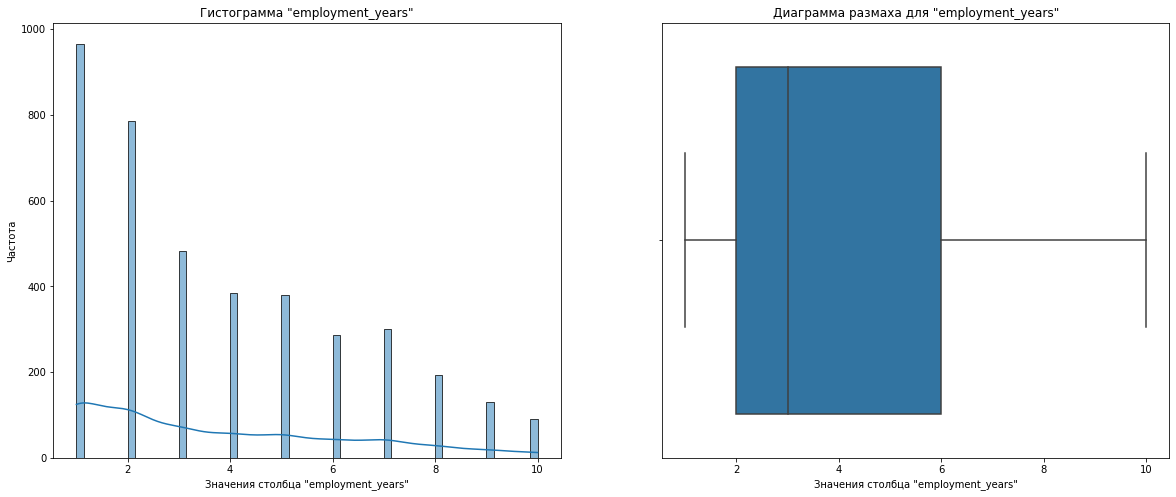

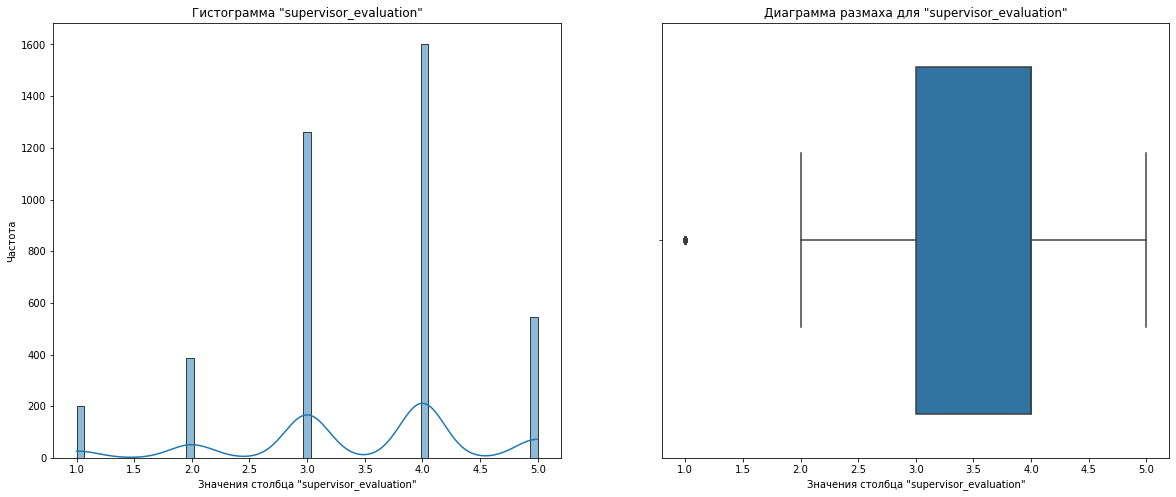

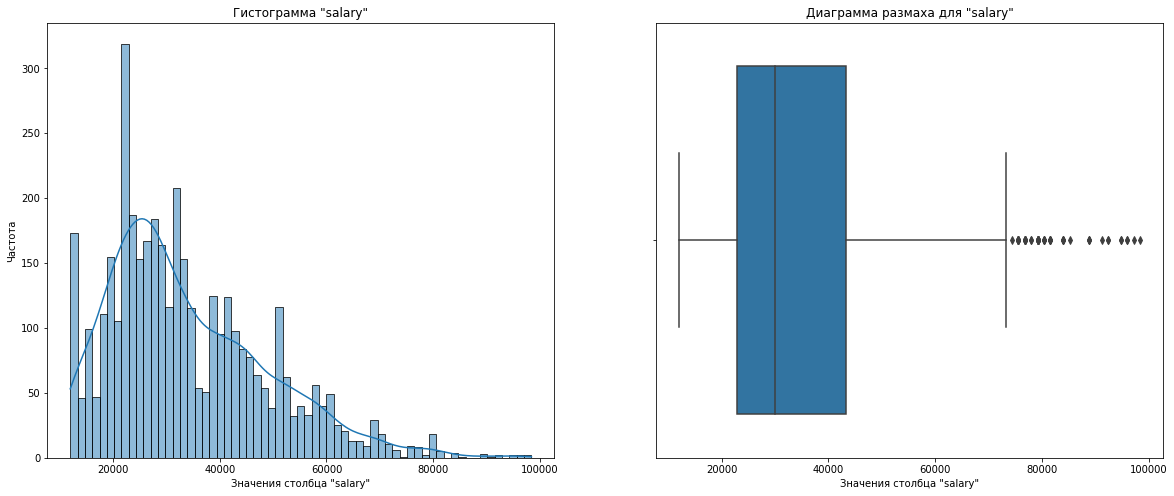

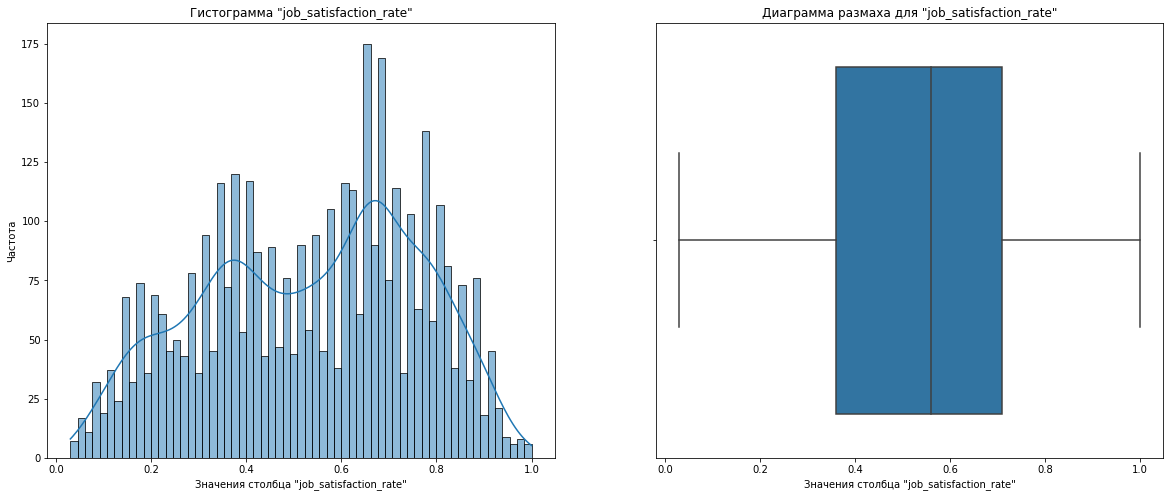

In [24]:
for name in train_job_satisfaction_num.columns:
    hist_box(train_job_satisfaction, name)

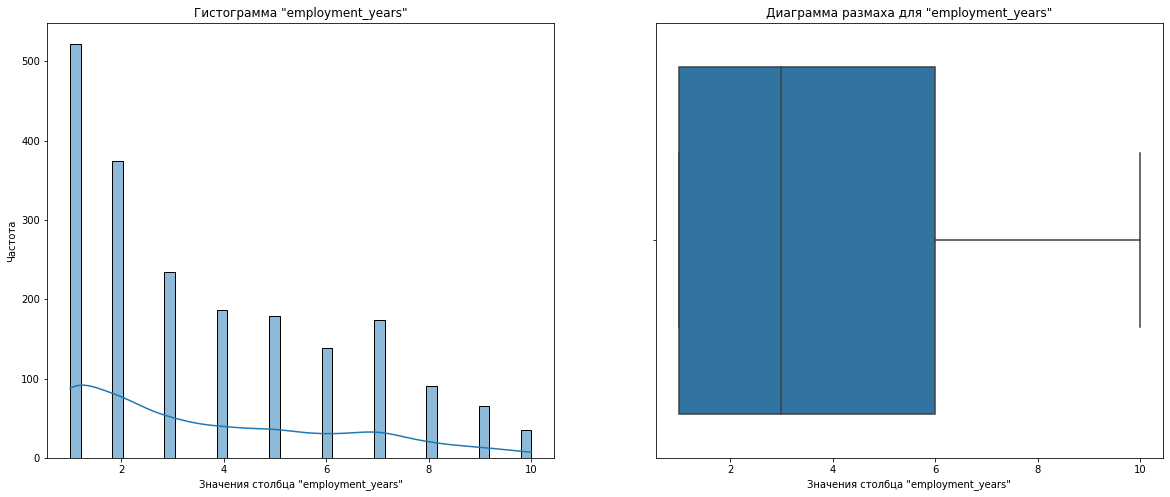

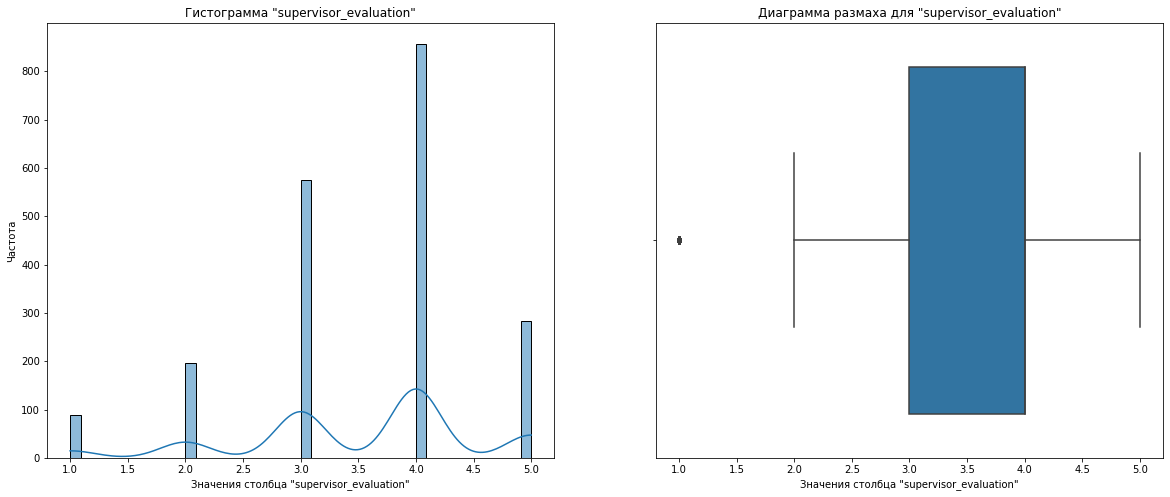

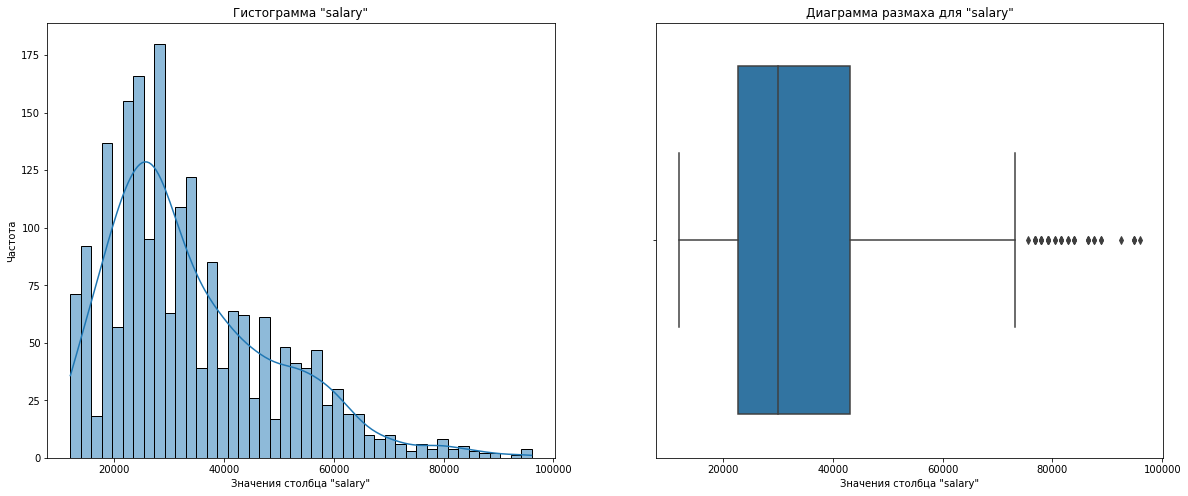

In [25]:
for name in test_features_num.columns:
    hist_box(test_features, name)

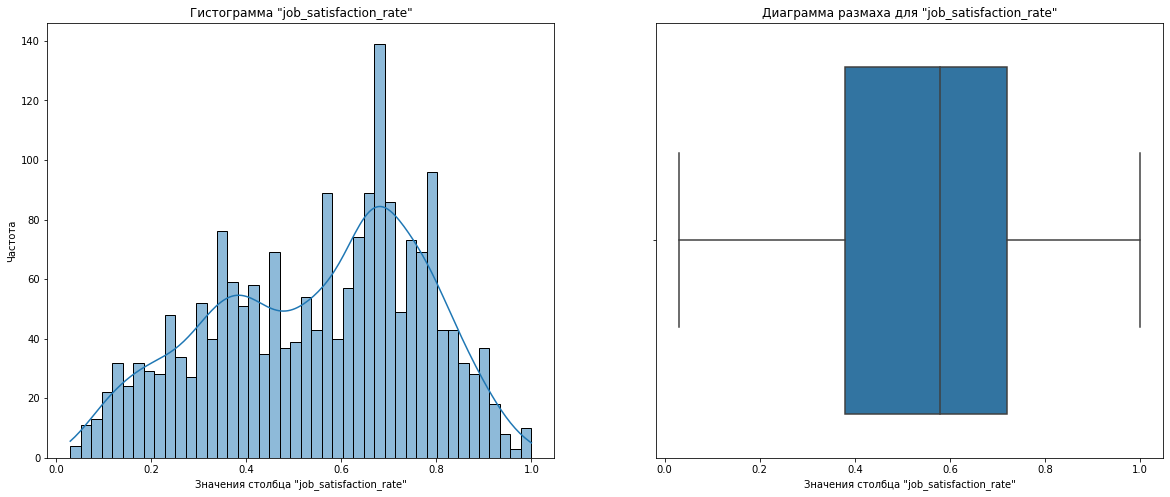

In [26]:
for name in test_target_job_satisfaction_num.columns:
    hist_box(test_target_job_satisfaction, name)

In [27]:
train_job_satisfaction_cat = train_job_satisfaction.select_dtypes(include='object')

In [28]:
test_features_cat = test_features.select_dtypes(include='object')

In [29]:
test_target_job_satisfaction_cat = test_target_job_satisfaction.select_dtypes(include='object')

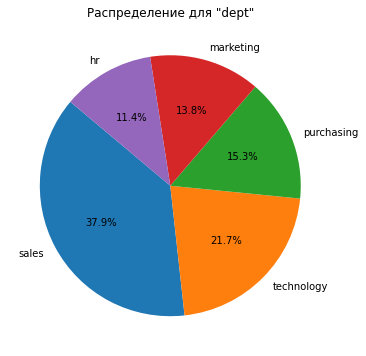

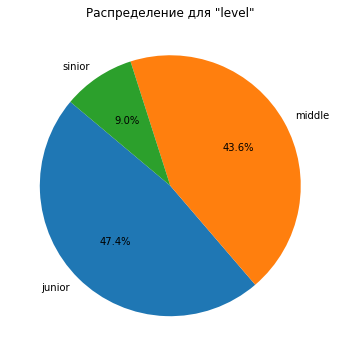

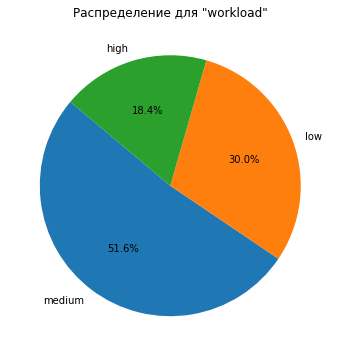

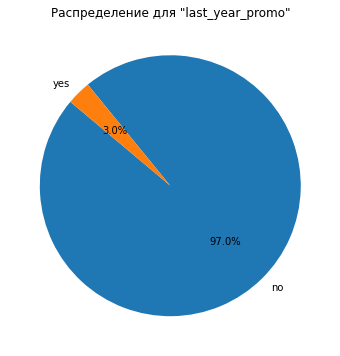

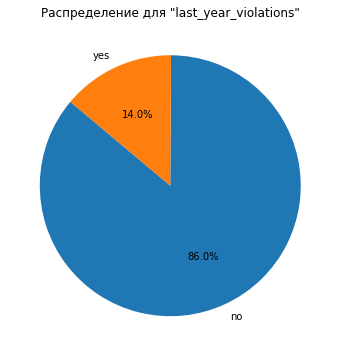

In [30]:
# Применение функции к категориальным данным
cat_func(train_job_satisfaction_cat)

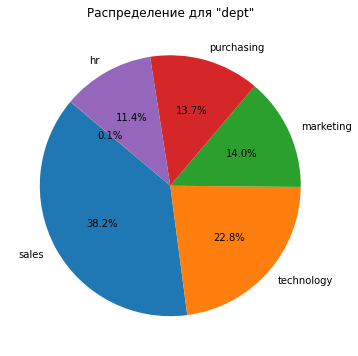

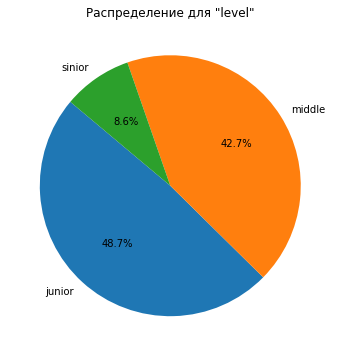

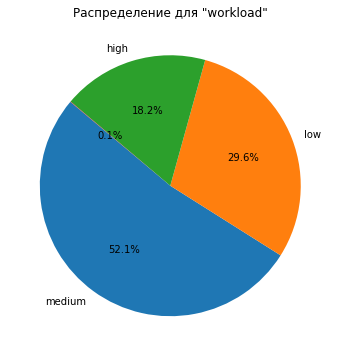

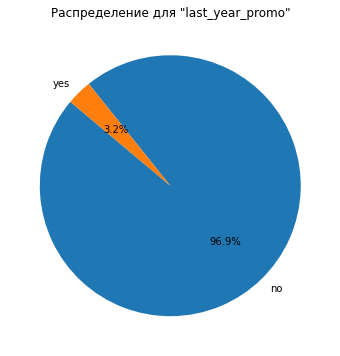

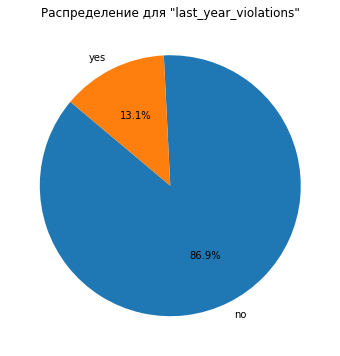

In [31]:
# Применение функции к категориальным данным
cat_func(test_features_cat)

In [32]:
# Применение функции к категориальным данным
cat_func(test_target_job_satisfaction_cat)

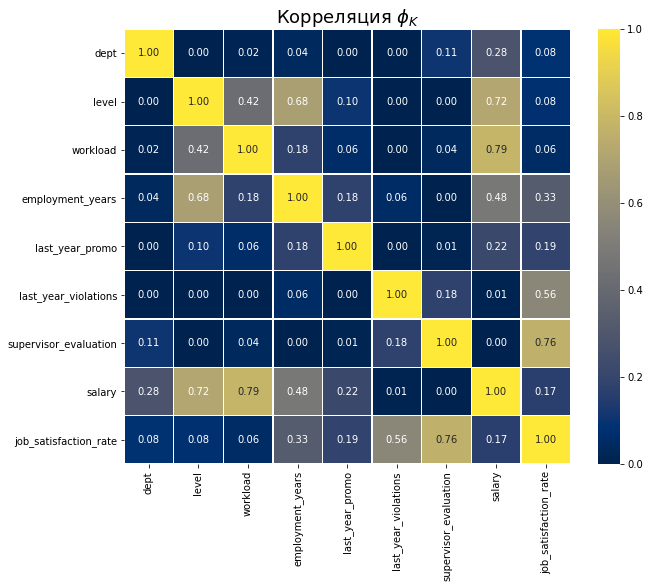

In [33]:
# Вычисление корреляции с использованием phik
correlation_matrix = train_job_satisfaction.drop('id', axis=1).phik_matrix(interval_cols = ['salary', 'job_satisfaction_rate'])

# Визуализация матрицы корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=.5, cmap='cividis', vmin=0, vmax=1)
plt.title(r'Корреляция $\phi_K$', fontsize=18)
plt.show()

/tmp/ipykernel_88/641220606.py:3: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.tight_layout(h_pad=10,w_pad=3)


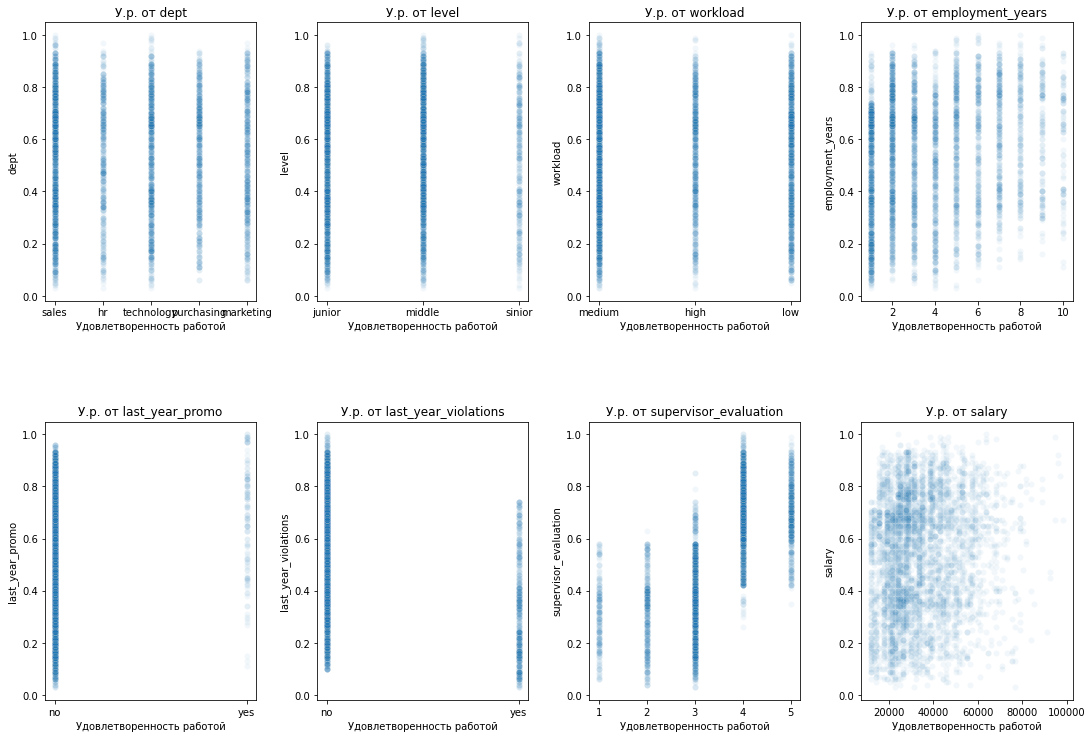

In [34]:
x=0
fig, axes = plt.subplots(2,4, figsize=(15, 10), constrained_layout=True)
fig.tight_layout(h_pad=10,w_pad=3)
axes = axes.ravel()
for col in train_job_satisfaction.columns.to_list()[1:-1]:
    ax = sns.scatterplot(data=train_job_satisfaction, y='job_satisfaction_rate', x=col, ax=axes[x], alpha=0.06)
    ax.set(xlabel='Удовлетворенность работой', ylabel=col, title=('У.р. от ' + col))
    x+=1

**Промежуточный вывод**

По описательной статистике можно сказать, что аномалий в данных не наблюдаются. Значение дисперсии и среднего ожидаемые.

Исследование данных позволило нам выявить следующие явления по признакам:
1) Зарплаты:
В распределении по зарплатам наблюдаются выбросы в большую сторону, что подверждает различие между средним (~35000) и медианным (33926) значениями.
Корреляция с оценкой удовлетворённости работой низкая (0.17)

2) Оценка удовлетворённости:
В распределении по оценке удволетворённости не наблюдаются сильные выбросы, есть слабое различие между средним (0.53) и медианным (0.55) значениями.

3) Оценка качества работы от руководителя:
Наблюдается сильная корреляция с оценкой удовлетворённости работой (0.76).
Присутствует различие между средним (3.46) и медианным (4.0) значениями.
Распределение по оценкам следующее:
4 - 39%
3 - 32%
5 - 14%
2 - 10%
1 - 5%

4) Количество нарушений за прошлый год:
Наблюдается сильная корреляция с оценкой удовлетворённости работой (0.57).
Распределение по факту нарушений следующее: да - 15%
нет - 85%

5) Наличие повышения в прошлом году:
Наблюдается слабая корреляция с оценкой удовлетворённости работой (0.19).
Присутствует различие между средним (3.47) и медианным (4.0) значениями .
Распределение по факту нарушений следующее:
да - 3%
нет - 97%

6) Стаж в компании:
Наблюдается слабая корреляция с оценкой удовлетворённости работой (0.32).
Присутствует различие между средним (3.8) и медианным (3.0) значениями.
В тройке самых распространённых показателей: 1 год - 23%, 2 года - 19%, 3 года - 12%
Наименьшую долю составляет стаж 10 лет - 2%

7) Нагрузка:  
Наблюдается слабая корреляция с оценкой удовлетворённости работой (0.06).   
Распределение по нагрузке следующее:   
    Низкая - 30%    
    Средняя - 51%  
    Высокая - 19%  
   
8) Уровень должности:  
Наблюдается слабая корреляция с оценкой удовлетворённости работой (0.08).   
Распределение по должности следующее:   
    junior - 47%    
    middle - 43%  
    sinior - 9%      
    
9) Департамент:  
Наблюдается слабая корреляция с оценкой удовлетворённости работой (0.07).  
Распределение по департментам следующее:   
    'sales' - 37%    
    'technology' - 22%  
    'purchasing' - 16%  
    'marketing' - 14%  
    'hr' - 12%

Мультиколлинеарность, которая обозначает высокую корреляцию между двумя или более входными признаками, может привести к проблемам в моделировании, так как она затрудняет определение влияния отдельных признаков на целевую переменную. Однако, в нашем случае, мультиколлинеарность не является проблемой, так как коэффициенты корреляции между признаками не достигают критического уровня (обычно 0.9 или выше).

## Шаг 4. Подготовка данных

In [35]:
display(train_job_satisfaction.head(5))
train_job_satisfaction.shape

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


(4000, 10)

In [36]:
display(test_features.head(5))
test_features.shape

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


(2000, 9)

In [37]:
display(test_target_job_satisfaction.head(5))
test_target_job_satisfaction.shape

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


(2000, 2)

In [38]:
#Тренировочная выборка
train_data = pd.read_csv('/datasets/train_job_satisfaction_rate.csv')
test_features = pd.read_csv('/datasets/test_features.csv')
test_targets = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')

X_train = train_data.sort_values(by='id').reset_index(drop=True).drop(columns=['job_satisfaction_rate'])
y_train = train_data.sort_values(by='id').reset_index(drop=True)[['id', 'job_satisfaction_rate']]
print(f'Размер X_train: {X_train.shape}')
display(X_train.head(3))
print(f'Размер y_train: {y_train.shape}')
display(y_train.head(3))

X_test = test_features.sort_values(by='id').reset_index(drop=True)#.drop(columns=['id', 'job_satisfaction_rate'])
y_test = test_targets.sort_values(by='id').reset_index(drop=True)[['id', 'job_satisfaction_rate']]
print(f'Размер X_test: {X_test.shape}')
display(X_test.head(3))
print(f'Размер y_test: {y_test.shape}')
display(y_test.head(3))

Размер X_train: (4000, 9)


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,100954,purchasing,junior,low,1,no,no,4,15600
1,101057,sales,junior,low,1,no,yes,4,19200
2,101074,sales,junior,medium,2,no,no,2,20400


Размер y_train: (4000, 2)


,id,job_satisfaction_rate
0,100954,0.60
1,101057,0.45
2,101074,0.36


Размер X_test: (2000, 9)


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,100298,hr,junior,low,2,no,no,4,19200
1,100480,marketing,junior,low,4,no,no,4,16800
2,100503,purchasing,middle,high,5,no,no,4,55200


Размер y_test: (2000, 2)


,id,job_satisfaction_rate
0,100298,0.80
1,100480,0.84
2,100503,0.79


In [39]:
X_train = X_train.drop(columns=['id'])
X_test = X_test.drop(columns=['id'])
y_train = y_train['job_satisfaction_rate']
y_test = y_test['job_satisfaction_rate']

print(f'Размер X_train: {X_train.shape}')
display(X_train.head(3))
print(f'Размер y_train: {y_train.shape}')
display(y_train.head(3))
print(f'Размер X_test: {X_test.shape}')
display(X_test.head(3))
print(f'Размер y_test: {y_test.shape}')
display(y_test.head(3))

Размер X_train: (4000, 8)


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,purchasing,junior,low,1,no,no,4,15600
1,sales,junior,low,1,no,yes,4,19200
2,sales,junior,medium,2,no,no,2,20400


Размер y_train: (4000,)


0    0.60
1    0.45
2    0.36
Name: job_satisfaction_rate, dtype: float64

Размер X_test: (2000, 8)


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,hr,junior,low,2,no,no,4,19200
1,marketing,junior,low,4,no,no,4,16800
2,purchasing,middle,high,5,no,no,4,55200


Размер y_test: (2000,)


0    0.80
1    0.84
2    0.79
Name: job_satisfaction_rate, dtype: float64

In [40]:
num_columns = ['employment_years', 'salary', 'supervisor_evaluation']
 
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
 
ord_columns = ['level', 'workload']

In [41]:
# Создание пайплайнов для обработки признаков
ohe_pipe = Pipeline([
    ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')), 
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

In [42]:
ord_pipe = Pipeline([
    ('simple_imputer_ord_before', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('ord', OrdinalEncoder(categories=[['junior', 'middle', 'sinior'], ['medium', 'low', 'high']], 
                           handle_unknown='use_encoded_value', unknown_value=np.nan)),
    ('simple_imputer_ord_after', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
])

In [43]:
# Создание конечного пайплайна
data_preprocessor = ColumnTransformer([
    ('ohe', ohe_pipe, ohe_columns), 
    ('ord', ord_pipe, ord_columns), 
    ('num', StandardScaler(), num_columns)
], remainder='passthrough')

## Шаг 5. Обучение моделей

In [44]:
def smape(a, f):
    return 100/len(a) * np.sum(2 * np.abs(f - a) / (np.abs(a) + np.abs(f)))

In [45]:
scorer = make_scorer(smape, greater_is_better=False)

In [46]:
# Создание конечного пайплайна
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor), 
    ('models', LinearRegression())
])

In [47]:
param_grid = [
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,20), 
        'models__max_features': range(2, 13),
        'models__min_samples_leaf': [2, 3 , 4, 5, 6, 7],
        'models__min_samples_split': [2, 4, 6],
        #'models__max_leaf_nodes': range(2,300),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']

    },
    {
        'models': [LinearRegression()], 
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

In [48]:
randomized_search = RandomizedSearchCV(
    pipe_final,
    param_grid,
    cv = 5,
    scoring = scorer,
    random_state = RANDOM_STATE,
    n_jobs = -1
)

In [49]:
# обучаем модель на тренировочной выборке
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore'))]),
                                                                               ['dept',
                                                                                'last_year_promo',
                                                                                'last_year_violations']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('simpl...
                                         'models__max_features': range(2, 13),
                                         'models__min_samples_leaf': [2, 3, 4,
                                                                      5, 6, 7],
                                         'models__min_samples_split': [2, 4, 6],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [LinearRegression()],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42,
                   scoring=make_scorer(smape, greater_is_better=False, response_method='predict'))

In [50]:
# Вывод результатов
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', round(randomized_search.best_score_, 2))
print(f'\n Лучшие переметры среди всех гиперпараметров:\n {randomized_search.best_params_}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simple_imputer_ord_before',
                                  

In [51]:
feature_names = randomized_search.best_estimator_.named_steps['preprocessor'].get_feature_names_out()

# Преобразование данных
X_test_transformed = pd.DataFrame(randomized_search.best_estimator_.named_steps['preprocessor'].transform(X_test),
                                   columns=feature_names)

X_test_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ohe__dept_marketing            2000 non-null   float64
 1   ohe__dept_purchasing           2000 non-null   float64
 2   ohe__dept_sales                2000 non-null   float64
 3   ohe__dept_technology           2000 non-null   float64
 4   ohe__last_year_promo_yes       2000 non-null   float64
 5   ohe__last_year_violations_yes  2000 non-null   float64
 6   ord__level                     2000 non-null   float64
 7   ord__workload                  2000 non-null   float64
 8   num__employment_years          2000 non-null   float64
 9   num__salary                    2000 non-null   float64
 10  num__supervisor_evaluation     2000 non-null   float64
dtypes: float64(11)
memory usage: 172.0 KB


/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [52]:
print(f'\n Метрика SMAPE на тестовой выборке: {scorer(randomized_search, X_test, y_test):.2f}')


 Метрика SMAPE на тестовой выборке: -13.75


/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


**Промежуточный вывод**

Лучшей моделью для предсказания уровня удовлетворённости сотрудников оказалась модель "Дерево решений" - DecisionTreeRegressor(max_depth=2, max_features=4, random_state=42). Метрика SMAPE качества для кросс валидационной выборки - 14.84. На тестовых данных - 13.75. Это соответсвует критерию успеха для тестовых данных: SMAPE <= 15

# Задача 2: предсказание увольнения сотрудника из компании

## Шаг 1. Загрузка данных

Загрузим и посмотрим данные 

In [53]:
#x_train
train_quit = pd.read_csv('/datasets/train_quit.csv')

In [54]:
train_quit.head(10)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no
5,699916,sales,junior,low,1,no,yes,3,18000,yes
6,417070,technology,middle,medium,8,no,no,2,44400,no
7,165489,sales,middle,low,4,no,no,5,19200,no
8,996399,marketing,middle,low,7,no,no,4,25200,no
9,613206,technology,middle,medium,2,no,no,3,45600,yes


In [55]:
train_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


In [56]:
#test_quit_y
test_target_quit = pd.read_csv('/datasets/test_target_quit.csv')

In [57]:
test_target_quit.head(10)

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes
5,223063,no
6,810370,no
7,998900,no
8,578329,no
9,648850,no


In [58]:
test_target_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


**Промежуточный вывод**

Просмотрела загруженные данные. Сверил их с описанием. Несоответствия описанным данным не обнаружила.

## Шаг 2. Предобработка данных

In [59]:
for f in DF_NAMES_2:
    print(f'Датасет {f}')
    display(globals()[f].info(True))

Датасет train_quit
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


None

Датасет test_target_quit
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


None

Типы данных соответствуют хранимым ими данным. Пропуски не наблюдаются. 

In [60]:
for f in DF_NAMES_2:
    print(f'В датасете {f} найдено дубликатов: {globals()[f].duplicated().sum()}')

В датасете train_quit найдено дубликатов: 0
В датасете test_target_quit найдено дубликатов: 0


In [61]:
#проверка на дубли
display(
        train_quit.duplicated().sum()/len(train_quit),
        test_target_quit.duplicated().sum()/len(test_target_quit)
       )

0.0

0.0

In [62]:
for f in DF_NAMES_2:
    print(f'Столбцы датафрейма {f}')
    globals()['col_cat_'] = globals()[f].select_dtypes(include='object').columns.to_list()
    globals()['col_num_'] = [x for x in globals()[f].columns.to_list() if x not in globals()['col_cat_']]
    print(f"Категориальные столбцы: \n {globals()['col_cat_']}\n"
          f"Численные столбцы: \n {globals()['col_num_']} \n")

Столбцы датафрейма train_quit
Категориальные столбцы: 
 ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations', 'quit']
Численные столбцы: 
 ['id', 'employment_years', 'supervisor_evaluation', 'salary'] 

Столбцы датафрейма test_target_quit
Категориальные столбцы: 
 ['quit']
Численные столбцы: 
 ['id'] 



In [63]:
for f in DF_NAMES_2:
    print(f"Датафрейм {f}")
    for c in globals()['col_cat_']:
        print(f"Уникальные значения столбца {c}:\n"  
              f"{(globals()[f][c]).unique()}")
    print('\n')

Датафрейм train_quit
Уникальные значения столбца quit:
['no' 'yes']


Датафрейм test_target_quit
Уникальные значения столбца quit:
['yes' 'no']




In [64]:
train_quit.shape , test_target_quit.shape

((4000, 10), (2000, 2))

**Промежуточный вывод**

Данные в датафреймах не содержат явных или неявных дублей. Отсудствуют пропуски.

## Шаг 3. Исследовательский анализ данных

3.1 Исследовательский анализ данных 

In [65]:
for f in DF_NAMES_2:
    print(f"Датафрейм {f}")
    print(f"{(globals()[f]).describe()}")
        
    print('\n')

Датафрейм train_quit
                  id  employment_years  supervisor_evaluation        salary
count    4000.000000       4000.000000            4000.000000   4000.000000
mean   552099.283750          3.701500               3.474750  33805.800000
std    260158.031387          2.541852               1.004049  15152.415163
min    100222.000000          1.000000               1.000000  12000.000000
25%    327785.750000          2.000000               3.000000  22800.000000
50%    546673.000000          3.000000               4.000000  30000.000000
75%    781497.750000          6.000000               4.000000  43200.000000
max    999915.000000         10.000000               5.000000  96000.000000


Датафрейм test_target_quit
                  id
count    2000.000000
mean   552765.213500
std    253851.326129
min    100298.000000
25%    339052.000000
50%    550793.000000
75%    765763.750000
max    999029.000000




Медианное значение по employement_years - 3,7 c мин значением 1 и максимальным 10. 
Медианное значение по supervisor_evaluation - 3,47 c мин значением 1 и максимальным 5
Медианное значение по salary - 33805 c мин значением 12000 и максимальным 96000

In [66]:
train_quit_num = train_quit.select_dtypes(include='number').drop(['id'], axis=1)

In [67]:
test_target_quit_num = test_target_quit.select_dtypes(include='number').drop(['id'], axis=1)

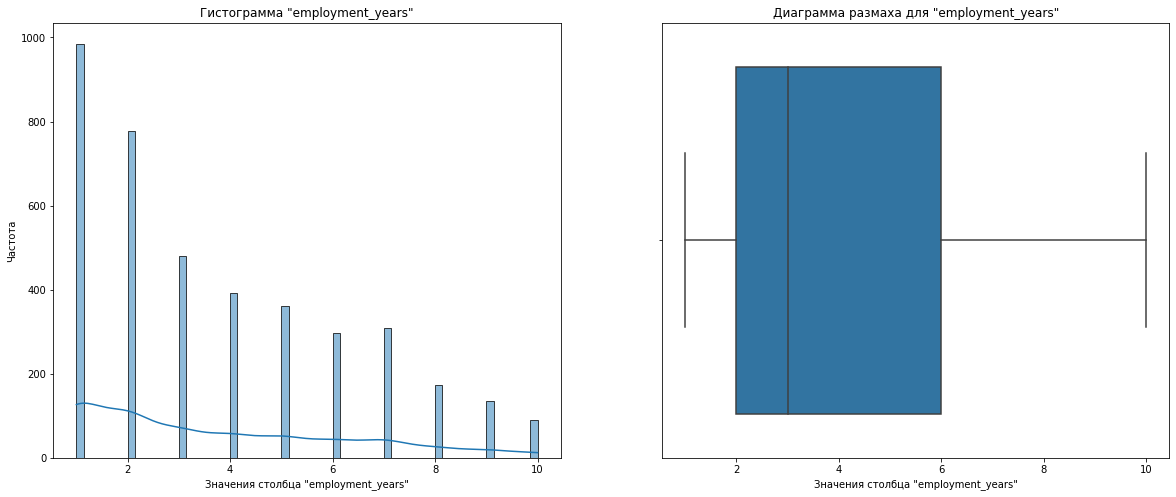

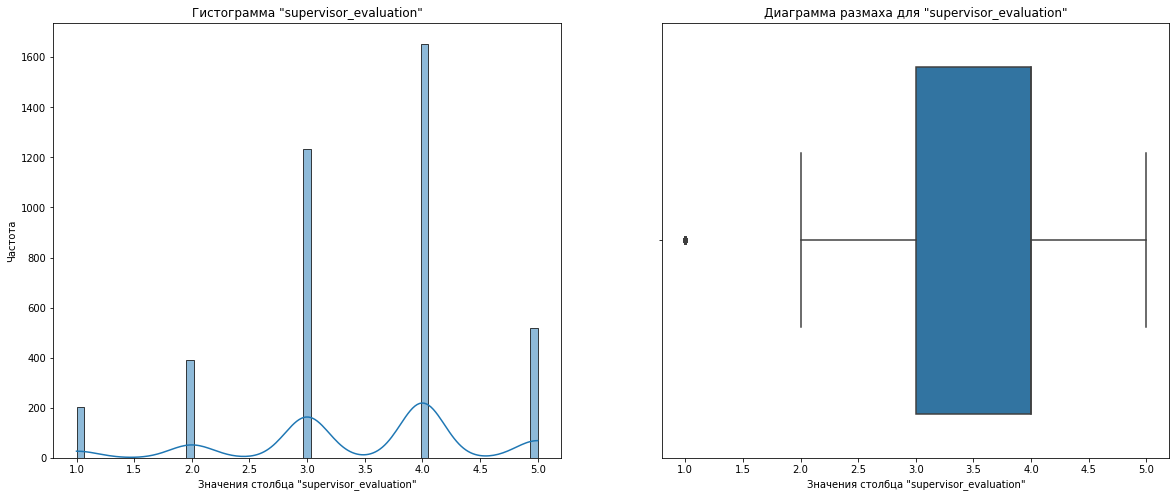

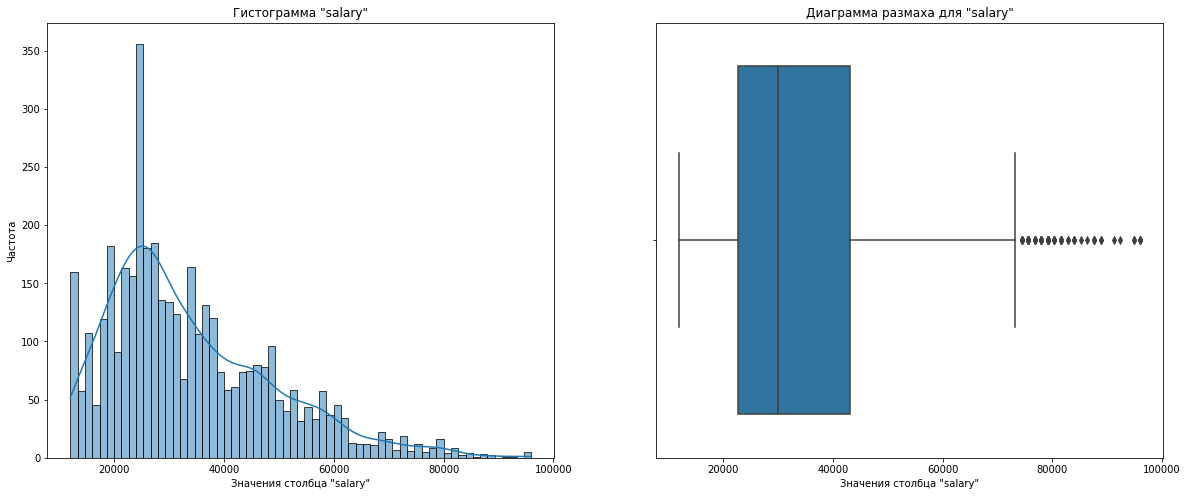

In [68]:
for name in train_quit_num.columns:
    hist_box(train_quit, name)

In [69]:
for name in test_target_quit_num.columns:
    hist_box(test_target_quit, name)

In [70]:
train_quit_cat = train_quit.select_dtypes(include='object')

In [71]:
test_target_quit_cat = test_target_quit.select_dtypes(include='object')

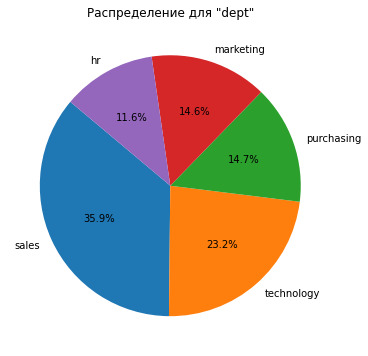

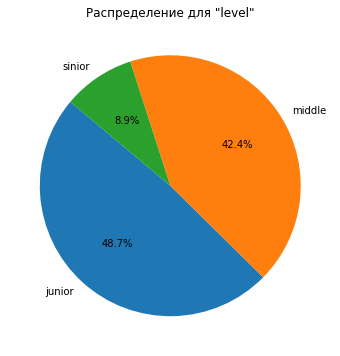

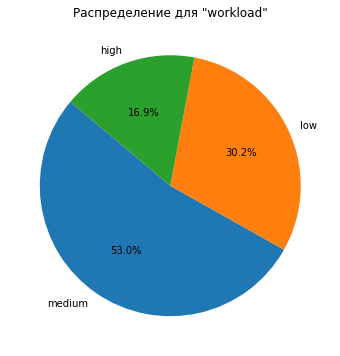

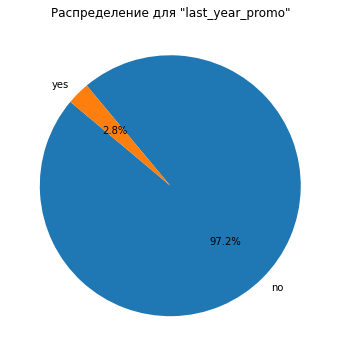

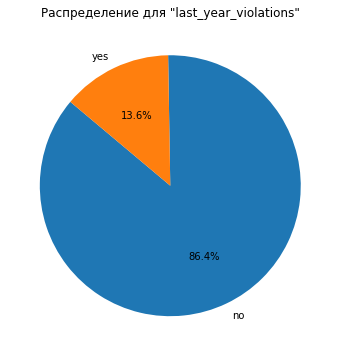

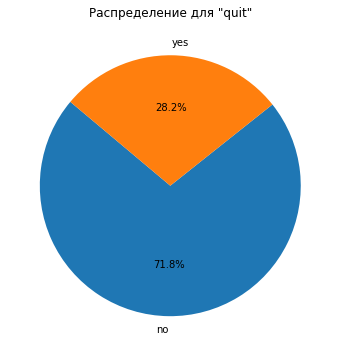

In [72]:
# Применение функции к категориальным данным
cat_func(train_quit_cat)

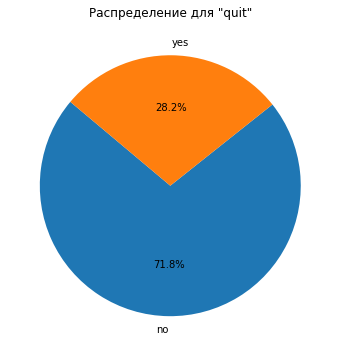

In [73]:
cat_func(test_target_quit_cat)

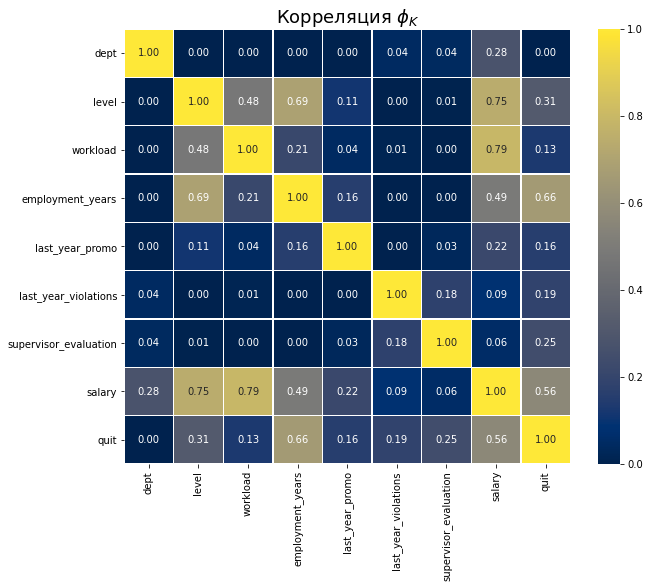

In [74]:
# Вычисление корреляции с использованием phik
correlation_matrix = train_quit.drop('id', axis=1).phik_matrix(interval_cols = ['salary', 'job_satisfaction_rate'])

# Визуализация матрицы корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=.5, cmap='cividis', vmin=0, vmax=1)
plt.title(r'Корреляция $\phi_K$', fontsize=18)
plt.show()

Медианное значение по employement_years - 3,7 c мин значением 1 и максимальным 10. Среднее значение 3 
Медианное значение по supervisor_evaluation - 3,47 c мин значением 1 и максимальным 5. Среднее значение 3,5 
Медианное значение по salary - 33805 c мин значением 12000 и максимальным 96000. Среднее значение около 30тыс 
Распределение dept^
hr-11%
marketing 14%
purchasing 14%
technology 23%
sales 36%
Распределение quit
yes 28%
no72%
Наибольшая зависимость наблюдается у employement_years, salary, workload

3.2 портрет «уволившегося сотрудника»

In [75]:
train_quit_yes = train_quit.query('quit == "yes"')
train_quit_no = train_quit.query('quit == "no"')
display(train_quit_yes.head(5), train_quit_no.head(5))

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
5,699916,sales,junior,low,1,no,yes,3,18000,yes
9,613206,technology,middle,medium,2,no,no,3,45600,yes
24,468145,technology,junior,medium,2,no,no,3,30000,yes
25,982346,marketing,junior,medium,3,no,no,3,30000,yes


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
4,910140,marketing,junior,medium,2,no,no,5,25200,no
6,417070,technology,middle,medium,8,no,no,2,44400,no


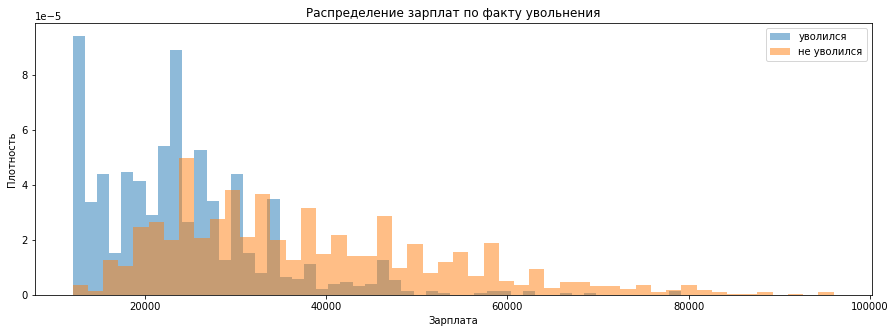

count     1128.000000
mean     23885.106383
std       9351.599505
min      12000.000000
5%       12000.000000
25%      16800.000000
50%      22800.000000
75%      27600.000000
95%      42000.000000
99%      52476.000000
max      79200.000000
Name: salary, dtype: float64

count     2872.000000
mean     37702.228412
std      15218.977339
min      12000.000000
5%       19200.000000
25%      25200.000000
50%      34800.000000
75%      46800.000000
95%      67200.000000
99%      80400.000000
max      96000.000000
Name: salary, dtype: float64

In [76]:
fig, ax = plt.subplots(figsize=(15, 5))



ax.hist(train_quit_yes['salary'], 50, alpha=0.5, density=True, label='уволился')
ax.hist(train_quit_no['salary'], 50, alpha=0.5, density=True, label='не уволился')

plt.title('Распределение зарплат по факту увольнения')
plt.xlabel('Зарплата')
plt.ylabel('Плотность')
plt.legend()
plt.show()


plt.show()
display(
    train_quit_yes['salary'].describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99]),
    train_quit_no['salary'].describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99])
)

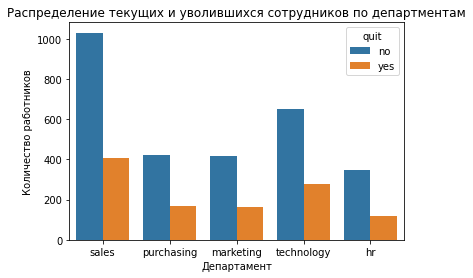

In [77]:
ax = sns.countplot(data = train_quit, x = 'dept', hue='quit')

ax.set_title('Распределение текущих и уволившихся сотрудников по департментам') 
plt.xlabel("Департамент")
plt.ylabel('Количество работников')


plt.show()

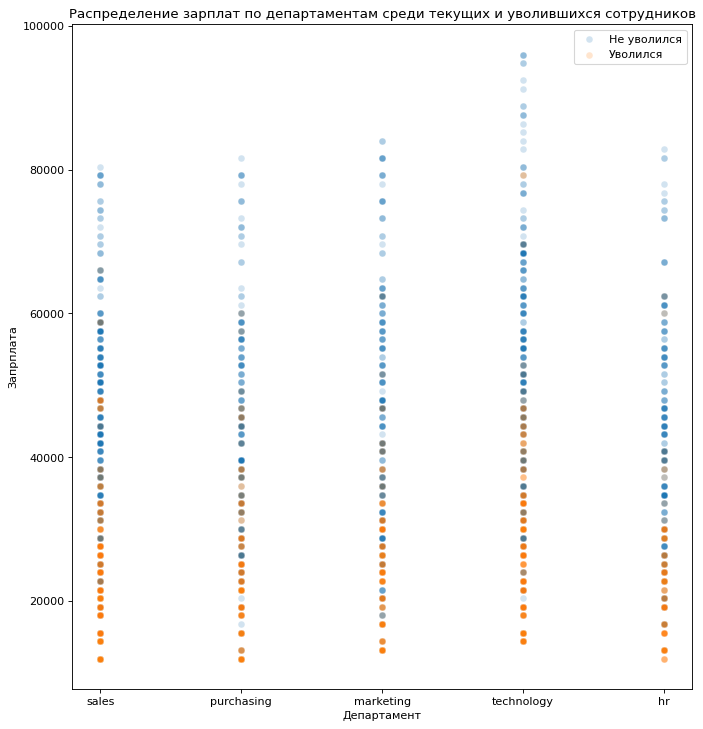

0.6551724137931034

In [78]:
plt.figure(figsize=(10,11), dpi= 80)
ax2 = sns.scatterplot(data=train_quit_no, x='dept', y='salary', alpha=0.2, label='Не уволился')
ax2 = sns.scatterplot(data=train_quit_yes, x='dept', y='salary', alpha=0.2, label='Уволился')
ax2.set_title('Распределение зарплат по департаментам среди текущих и уволившихся сотрудников')
plt.xlabel("Департамент")
plt.ylabel('Запрплата')
plt.show()

display(train_quit_yes['salary'].median() / train_quit_no['salary'].median())

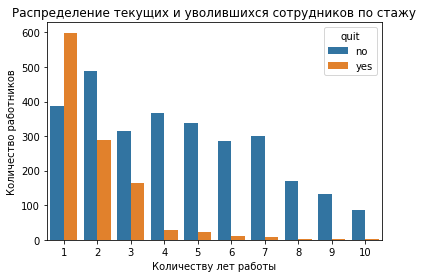

In [79]:
ax = sns.countplot(data = train_quit, x = 'employment_years', hue='quit')

ax.set_title('Распределение текущих и уволившихся сотрудников по стажу') 
plt.xlabel("Количеству лет работы")
plt.ylabel('Количество работников')


plt.show()

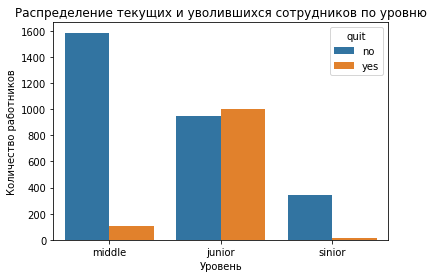

In [80]:
ax = sns.countplot(data = train_quit, x = 'level', hue='quit')

ax.set_title('Распределение текущих и уволившихся сотрудников по уровню') 
plt.xlabel("Уровень")
plt.ylabel('Количество работников')


plt.show()

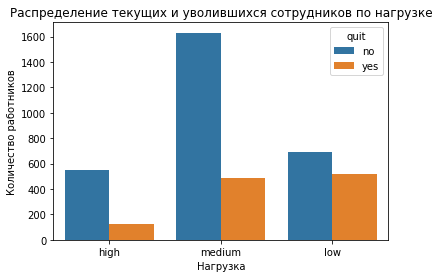

In [81]:
ax = sns.countplot(data = train_quit, x = 'workload', hue='quit')

ax.set_title('Распределение текущих и уволившихся сотрудников по нагрузке') 
plt.xlabel("Нагрузка")
plt.ylabel('Количество работников')


plt.show()

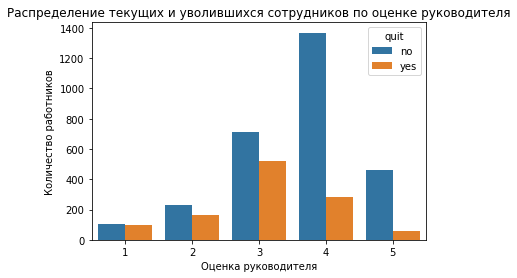

In [82]:
ax = sns.countplot(data = train_quit, x = 'supervisor_evaluation', hue='quit')

ax.set_title('Распределение текущих и уволившихся сотрудников по оценке руководителя') 
plt.xlabel("Оценка руководителя")
plt.ylabel('Количество работников')


plt.show()

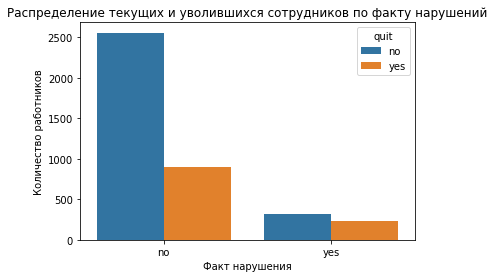

In [83]:
ax = sns.countplot(data = train_quit, x = 'last_year_violations', hue='quit')

ax.set_title('Распределение текущих и уволившихся сотрудников по факту нарушений') 
plt.xlabel("Факт нарушения")
plt.ylabel('Количество работников')


plt.show()

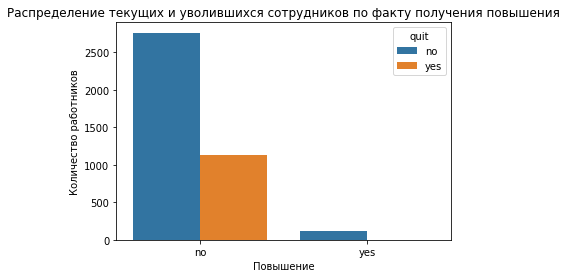

In [84]:
ax = sns.countplot(data = train_quit, x = 'last_year_promo', hue='quit')

ax.set_title('Распределение текущих и уволившихся сотрудников по факту получения повышения') 
plt.xlabel("Повышение")
plt.ylabel('Количество работников')


plt.show()

**Промежуточный вывод**

По описательной статистике можно сказать, что аномалий в данных не наблюдаются. Значение дисперсии и среднего ожидаемые.
3.1 Исследование данных 
Медианное значение по employement_years - 3,7 c мин значением 1 и максимальным 10. Среднее значение 3 
Медианное значение по supervisor_evaluation - 3,47 c мин значением 1 и максимальным 5. Среднее значение 3,5 
Медианное значение по salary - 33805 c мин значением 12000 и максимальным 96000. Среднее значение около 30тыс 
Распределение dept^
hr-11%
marketing 14%
purchasing 14%
technology 23%
sales 36%
Распределение quit
yes 28%
no72%
Наибольшая зависимость наблюдается у employement_years, salary, workload

3.2 При составлении портрета уволившегося сотрудника выяснили следующее:
- Наиобильшее соотношение уволившихся к оставшимся в департаменте комплектования (0.38), наименьшее - в HR(0.30)
- Соотношение медиан зарплат уволившихся к оставшимся = 0.61 - зарплаты первой группы ниже на 39%
- Медиана удовлетворённости работой у уволившихся = 0.37, у оставшихся = 0.66
- Количество уволившихся превалирует среди группы сотрудников со стажем меньше 4 лет
- Количество уволившихся превалирует среди группы сотрудников с уровнем junior
- Количество уволившихся превалирует среди группы сотрудников с низким уровнем нагрузки
- Группа уволившихся сотрудников превалирует среди тех, кого руководитель оценил ниже 4 баллов
- Группа уволившихся сотрудников превалирует среди тех, кто соврешал нарушения в прошлом году
- В группе не получивших повышение почти в равной степени представлены и уволившиеся сотрудники, и оставшиеся



## Шаг 4. Добавление нового входного признака

In [85]:
train_quit.head(3)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no


In [86]:
test_features.head(3)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200


In [87]:
train_quit['job_satisfaction_rate'] = randomized_search.predict(train_quit.drop(['id', 'quit'], axis=1))
display(train_quit)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
0,723290,sales,middle,high,2,no,no,4,54000,no,0.631087
1,814010,sales,junior,medium,2,no,no,4,27600,no,0.822093
2,155091,purchasing,middle,medium,5,no,no,1,37200,no,0.360000
3,257132,sales,junior,medium,2,no,yes,3,24000,yes,0.340000
4,910140,marketing,junior,medium,2,no,no,5,25200,no,0.795000
...,...,...,...,...,...,...,...,...,...,...,...
3995,588809,sales,junior,medium,4,no,no,3,26400,no,0.528571
3996,672059,sales,middle,high,9,no,no,4,52800,no,0.832647
3997,536432,purchasing,junior,low,2,no,yes,4,12000,yes,0.560000
3998,692133,purchasing,middle,medium,2,no,no,4,33600,no,0.490333


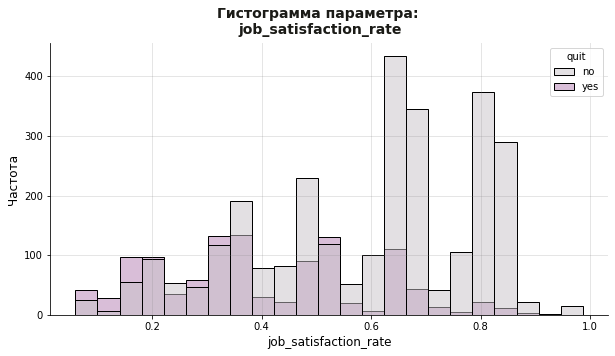

In [88]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)
# создание сетки из подграфиков
ax1.grid(which='major', linewidth=1, color='gray', alpha=0.2)
# изменение параметров сетки
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
# удаление линий осей
    
fig.suptitle(f'''Гистограмма параметра: \n{'job_satisfaction_rate'}''', 
                     fontsize=14,
                     fontweight='demi',
                     color='#1B1B17')
# добавление заголовка

sns.histplot(train_quit, 
                     x='job_satisfaction_rate',
                     hue='quit',
                     palette=['#C8C3C9', '#B47EB2'],
                     ax=ax1
            )
# создание гистограммы
        
plt.xlabel('job_satisfaction_rate', fontsize=12)
plt.ylabel('Частота', fontsize=12)
# подпись оси x
        
plt.show()
# вывод графика

In [89]:
print('Cредний коэффициент удовлетворенности работой ушедших сотрудников:', round(train_quit.query("quit == 'yes'")['job_satisfaction_rate'].mean(), 3))
print('Cредний коэффициент удовлетворенности работой оставшихся сотрудников:', round(train_quit.query("quit == 'no'")['job_satisfaction_rate'].mean(), 3))

Cредний коэффициент удовлетворенности работой ушедших сотрудников: 0.398
Cредний коэффициент удовлетворенности работой оставшихся сотрудников: 0.591


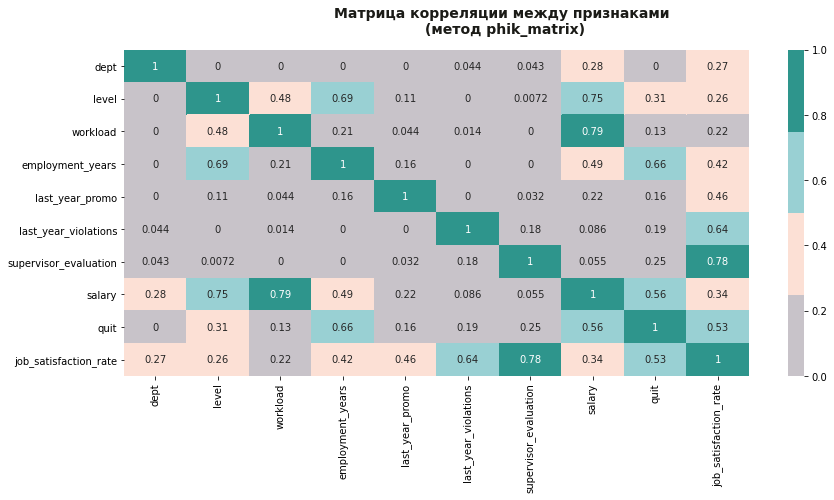

In [90]:
fig = plt.figure(figsize=(14, 6))
fig.suptitle(f'Матрица корреляции между признаками\n (метод phik_matrix)', fontsize=14, fontweight='demi', color='#1B1B17')
ax1 = fig.add_subplot(1, 1, 1)
sns.heatmap(train_quit.drop('id', axis=1).phik_matrix(interval_cols=['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']), ax=ax1, cmap=['#C8C3C9', '#FCE0D5', '#99D0D3', '#2E958C'], annot=True)

plt.show()
# построение тепловой карты корреляций с помощью метода phik_matrix()

Из всех входных признаков больше всего коррелируют между собой переменные salary и workload (коэффициент phik 0.79), salary и level (коэффициент phik 0.75). В данном случае мы не можем говорить о возможном наличии мультиколлинеарности, так как коэффициенты корреляций меньше 0.85.

/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:82: UserWarning: Not enough unique value for variable quit for analysis 1. Dropping this column
  warnings.warn(


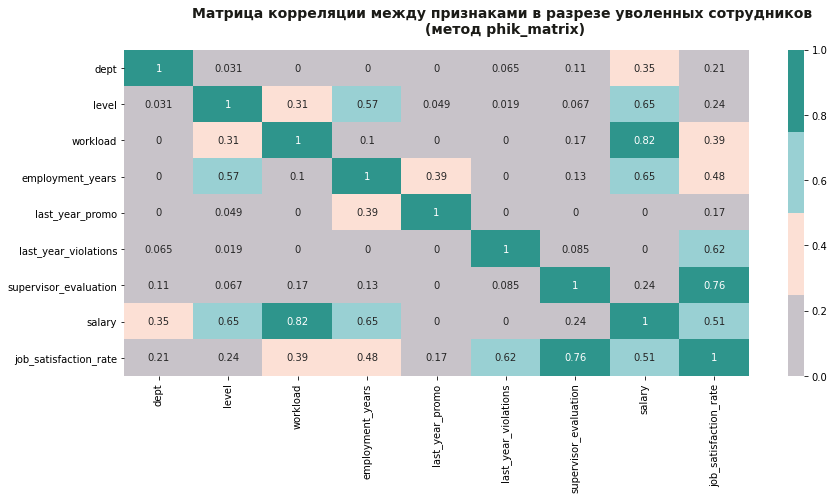

In [91]:
fig = plt.figure(figsize=(14, 6))
fig.suptitle(f'Матрица корреляции между признаками в разрезе уволенных сотрудников\n (метод phik_matrix)', fontsize=14, fontweight='demi', color='#1B1B17')
ax1 = fig.add_subplot(1, 1, 1)
sns.heatmap(train_quit.query("quit == 'yes'").drop('id', axis=1).phik_matrix(interval_cols=['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']), ax=ax1, cmap=['#C8C3C9', '#FCE0D5', '#99D0D3', '#2E958C'], annot=True)

plt.show()
# построение тепловой карты корреляций с помощью метода phik_matrix()

В разрезе уволенных сотрудников больше всего корреляции между salary, workload - 0.82 и salary, job satisfaction - 0.68 

/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:82: UserWarning: Not enough unique value for variable quit for analysis 1. Dropping this column
  warnings.warn(


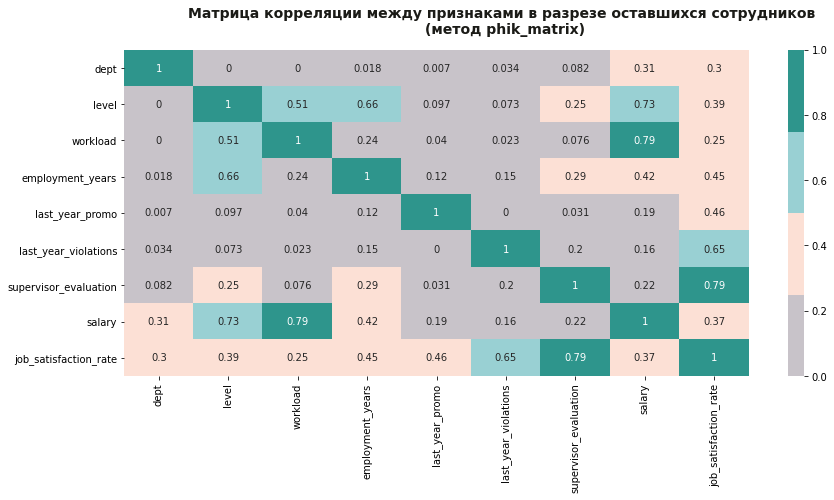

In [92]:
fig = plt.figure(figsize=(14, 6))
fig.suptitle(f'Матрица корреляции между признаками в разрезе оставшихся сотрудников\n (метод phik_matrix)', fontsize=14, fontweight='demi', color='#1B1B17')
ax1 = fig.add_subplot(1, 1, 1)
sns.heatmap(train_quit.query("quit == 'no'").drop('id', axis=1).phik_matrix(interval_cols=['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']), ax=ax1, cmap=['#C8C3C9', '#FCE0D5', '#99D0D3', '#2E958C'], annot=True)

plt.show()
# построение тепловой карты корреляций с помощью метода phik_matrix()

В разрезе оставшихся сотрудников больше всего коррелируют salary, workload - 0.79 и salary, level - 0.73

## Шаг 5. Подготовка данных

In [94]:
train_quit['job_satisfaction_rate'] = randomized_search.predict(train_quit.drop(['id', 'quit'], axis=1))
train_quit 

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
0,723290,sales,middle,high,2,no,no,4,54000,no,0.631087
1,814010,sales,junior,medium,2,no,no,4,27600,no,0.822093
2,155091,purchasing,middle,medium,5,no,no,1,37200,no,0.360000
3,257132,sales,junior,medium,2,no,yes,3,24000,yes,0.340000
4,910140,marketing,junior,medium,2,no,no,5,25200,no,0.795000
...,...,...,...,...,...,...,...,...,...,...,...
3995,588809,sales,junior,medium,4,no,no,3,26400,no,0.528571
3996,672059,sales,middle,high,9,no,no,4,52800,no,0.832647
3997,536432,purchasing,junior,low,2,no,yes,4,12000,yes,0.560000
3998,692133,purchasing,middle,medium,2,no,no,4,33600,no,0.490333


In [95]:
test_features['job_satisfaction_rate'] = randomized_search.predict(test_features)
display(train_quit)

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
0,723290,sales,middle,high,2,no,no,4,54000,no,0.631087
1,814010,sales,junior,medium,2,no,no,4,27600,no,0.822093
2,155091,purchasing,middle,medium,5,no,no,1,37200,no,0.360000
3,257132,sales,junior,medium,2,no,yes,3,24000,yes,0.340000
4,910140,marketing,junior,medium,2,no,no,5,25200,no,0.795000
...,...,...,...,...,...,...,...,...,...,...,...
3995,588809,sales,junior,medium,4,no,no,3,26400,no,0.528571
3996,672059,sales,middle,high,9,no,no,4,52800,no,0.832647
3997,536432,purchasing,junior,low,2,no,yes,4,12000,yes,0.560000
3998,692133,purchasing,middle,medium,2,no,no,4,33600,no,0.490333


In [96]:
display(train_quit.head(3))
train_quit.shape

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
0,723290,sales,middle,high,2,no,no,4,54000,no,0.631087
1,814010,sales,junior,medium,2,no,no,4,27600,no,0.822093
2,155091,purchasing,middle,medium,5,no,no,1,37200,no,0.360000


(4000, 11)

In [97]:
display(test_features.head(3))
test_features.shape

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,485046,marketing,junior,medium,2,no,no,5,28800,0.883333
1,686555,hr,junior,medium,1,no,no,4,30000,0.665000
2,467458,sales,middle,low,5,no,no,4,19200,0.648750


(2000, 10)

In [98]:
display(test_target_quit.head(5))
test_target_quit.shape

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


(2000, 2)

In [99]:
#Тренировочная выборка
#train_data = pd.read_csv('/datasets/train_quit.csv')
train_data = train_quit
#test_features = pd.read_csv('/datasets/test_features.csv')
test_features = test_features
#test_targets = pd.read_csv('/datasets/test_target_quit.csv')
test_targets = test_target_quit

X_train = train_data.sort_values(by='id').reset_index(drop=True).drop(columns=['quit'])
y_train = train_data.sort_values(by='id').reset_index(drop=True)[['id', 'quit']]
print(f'Размер X_train: {X_train.shape}')
display(X_train.head(3))
print(f'Размер y_train: {y_train.shape}')
display(y_train.head(3))

X_test = test_features.sort_values(by='id').reset_index(drop=True)#.drop(columns=['id', 'job_satisfaction_rate'])
y_test = test_targets.sort_values(by='id').reset_index(drop=True)[['id', 'quit']]
print(f'Размер X_test: {X_test.shape}')
display(X_test.head(3))
print(f'Размер y_test: {y_test.shape}')
display(y_test.head(3))

y_train = y_train['quit']
y_test = y_test['quit']

X_train = X_train.drop(columns=['id'])
X_test = X_test.drop(columns=['id'])
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

print(f'Размер X_train: {X_train.shape}')
display(X_train.head(3))
print(f'Размер y_train: {y_train.shape}')
display(y_train)
print(f'Размер X_test: {X_test.shape}')
display(X_test.head(3))
print(f'Размер y_test: {y_test.shape}')
display(y_test)

Размер X_train: (4000, 10)


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,100222,sales,junior,medium,3,no,no,2,20400,0.336000
1,100459,purchasing,junior,medium,3,no,no,3,21600,0.333333
2,100469,marketing,junior,medium,1,no,no,4,28800,0.647273


Размер y_train: (4000, 2)


,id,quit
0,100222,yes
1,100459,yes
2,100469,no


Размер X_test: (2000, 10)


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,100298,hr,junior,low,2,no,no,4,19200,0.832258
1,100480,marketing,junior,low,4,no,no,4,16800,0.852000
2,100503,purchasing,middle,high,5,no,no,4,55200,0.784200


Размер y_test: (2000, 2)


,id,quit
0,100298,no
1,100480,no
2,100503,no


Размер X_train: (4000, 9)


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,sales,junior,medium,3,no,no,2,20400,0.336000
1,purchasing,junior,medium,3,no,no,3,21600,0.333333
2,marketing,junior,medium,1,no,no,4,28800,0.647273


Размер y_train: (4000,)


array([1, 1, 0, ..., 1, 0, 0])

Размер X_test: (2000, 9)


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,hr,junior,low,2,no,no,4,19200,0.832258
1,marketing,junior,low,4,no,no,4,16800,0.852000
2,purchasing,middle,high,5,no,no,4,55200,0.784200


Размер y_test: (2000,)


array([0, 0, 0, ..., 1, 0, 1])

In [100]:
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = ['employment_years',
               'supervisor_evaluation',
               'salary',
               'job_satisfaction_rate']

In [101]:
ohe_pipe = Pipeline([
    ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')), 
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

In [102]:
ord_pipe = Pipeline(
    [
    (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
     ('ord',OrdinalEncoder(
                categories=[
                    ['sinior', 'middle', 'junior'],
                    ['high', 'medium', 'low']
                ], 
                handle_unknown='use_encoded_value',
                unknown_value=np.nan
            )
     ),
    (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
    ]
    )

In [103]:
data_preprocessor = ColumnTransformer([
    ('ohe', ohe_pipe, ohe_columns), 
    ('ord', ord_pipe, ord_columns), 
    ('num', StandardScaler(), num_columns)
], remainder='passthrough')

## Шаг 6. Обучение модели

In [104]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [105]:
param_grid = [
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 17),
        'models__max_features': range(2, 17),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    
    {
        'models': [SVC(random_state=RANDOM_STATE)],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  

    }
]

In [106]:
randomized_search = RandomizedSearchCV(
    pipe_final,
    param_grid,
    cv = 5,
    scoring = 'roc_auc',
    random_state = RANDOM_STATE,
    n_jobs = -1
)

In [107]:
# обучаем модель на тренировочной выборке
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore'))]),
                                                                               ['dept',
                                                                                'last_year_promo',
                                                                                'last_year_violations']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('simpl...
                                         'models__max_features': range(2, 17),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [KNeighborsClassifier()],
                                         'models__n_neighbors': range(2, 20),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(random_state=42)],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

In [108]:
# Вывод результатов
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', round(randomized_search.best_score_, 2))

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                   

In [109]:
y_test_proba = randomized_search.predict_proba(X_test)
y_test_pred = randomized_search.predict(X_test)
print(f'Метрика ROC-AUC на тестовой выборке: {round(roc_auc_score(y_test, y_test_proba[:, 1]), 3)}')
print(f'Метрика F1 на тестовой выборке: {round(f1_score(y_test, y_test_pred), 3)}')
# рассчитаем прогноз на тестовых данных 

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Метрика ROC-AUC на тестовой выборке: 0.917
Метрика F1 на тестовой выборке: 0.804


In [110]:
# Анализ ошибок модели
conf_matrix = confusion_matrix(y_test, y_test_pred)
print('Матрица ошибок на тестовой выборке:\n', conf_matrix)
print('Отчет о классификации на тестовой выборке:\n', classification_report(y_test, y_test_pred))

Матрица ошибок на тестовой выборке:
 [[1333  103]
 [ 116  448]]
Отчет о классификации на тестовой выборке:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92      1436
           1       0.81      0.79      0.80       564

    accuracy                           0.89      2000
   macro avg       0.87      0.86      0.86      2000
weighted avg       0.89      0.89      0.89      2000



Построение кривой precision-recall: Кривая позволяет оценить производительность модели при различных порогах вероятности классификации.

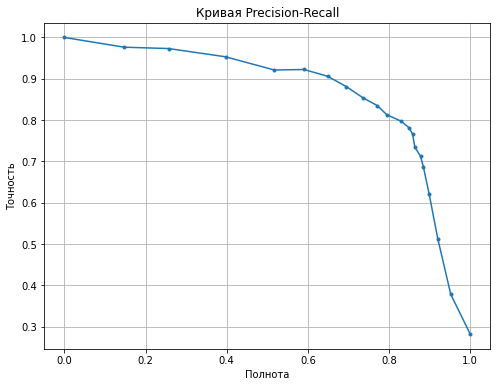

In [111]:
# Построение кривой precision-recall
precision, recall, _ = precision_recall_curve(y_test, y_test_proba[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Полнота')
plt.ylabel('Точность')
plt.title('Кривая Precision-Recall')
plt.grid(True)
plt.show()

На данном этапе были обучены и протестированны три модели с вручную настроенным перебором гиперпараметров:
DecisionTreeClassifier, KNeighborsClassifier и SVC. Для оценки качества работы модели была использована использована метрика ROC-AUC. Критерием успешности модели является показатель ROC-AUC ≥ 0.91. Лучше всего себя проявила модель KNeighborsClassifier.
Тренировочная выборка: 0.92
Тестовая выборка: 0.91

## Общий вывод

Задача 1: предсказание уровня удовлетворённости сотрудника

- Загрузка данных.

Данные были загружены и представлены в 3 таблицах:

Датасет train_job_satisfaction_df содержит 4000 записей и 9 переменных. Столбцы dept и level имеют пропуски, которые необходимо обработать. Данная выборка является тренировочной - (X_train)

Датасет test_features_df содержит 2000 записей и 8 признаков. Столбцы dept и level имеют пропуски, которые необходимо обработать. Данная выборка содержит в себе входные признаки тестовой выборки.(X_test)

Датасет test_target_job_satisfaction_df содержит 2000 записей . Датасет признак целевой переменной тестовой выборки(y_true)

- Предобработка данных.


В test_features столбцы dept, level и workload, и в таблице test_target столбец dept содержат пропуски. Об этом было указано чуть раньше, а обработаю это позже.

Вывод: данные в датафреймах не содержат явных или неявных дублей. 

- Исследовательский анализ данных.

По описательной статистике можно сказать, что аномалий в данных не наблюдаются. Значение дисперсии и среднего ожидаемые.

Исследование данных позволило нам выявить следующие явления по признакам:
1) Зарплаты:
В распределении по зарплатам наблюдаются выбросы в большую сторону, что подверждает различие между средним (~35000) и медианным (33926) значениями.
Корреляция с оценкой удовлетворённости работой низкая (0.17)

2) Оценка удовлетворённости:
В распределении по оценке удволетворённости не наблюдаются сильные выбросы, есть слабое различие между средним (0.53) и медианным (0.55) значениями.

3) Оценка качества работы от руководителя:
Наблюдается сильная корреляция с оценкой удовлетворённости работой (0.76).
Присутствует различие между средним (3.46) и медианным (4.0) значениями.
Распределение по оценкам следующее:
4 - 39%
3 - 32%
5 - 14%
2 - 10%
1 - 5%

4) Количество нарушений за прошлый год:
Наблюдается сильная корреляция с оценкой удовлетворённости работой (0.57).
Распределение по факту нарушений следующее: да - 15%
нет - 85%

5) Наличие повышения в прошлом году:
Наблюдается слабая корреляция с оценкой удовлетворённости работой (0.19).
Присутствует различие между средним (3.47) и медианным (4.0) значениями .
Распределение по факту нарушений следующее:
да - 3%
нет - 97%

6) Стаж в компании:
Наблюдается слабая корреляция с оценкой удовлетворённости работой (0.32).
Присутствует различие между средним (3.8) и медианным (3.0) значениями.
В тройке самых распространённых показателей: 1 год - 23%, 2 года - 19%, 3 года - 12%
Наименьшую долю составляет стаж 10 лет - 2%

7) Нагрузка:  
Наблюдается слабая корреляция с оценкой удовлетворённости работой (0.06).   
Распределение по нагрузке следующее:   
    Низкая - 30%    
    Средняя - 51%  
    Высокая - 19%  
   
8) Уровень должности:  
Наблюдается слабая корреляция с оценкой удовлетворённости работой (0.08).   
Распределение по должности следующее:   
    junior - 47%    
    middle - 43%  
    sinior - 9%      
    
9) Департамент:  
Наблюдается слабая корреляция с оценкой удовлетворённости работой (0.07).  
Распределение по департментам следующее:   
    'sales' - 37%    
    'technology' - 22%  
    'purchasing' - 16%  
    'marketing' - 14%  
    'hr' - 12%

Мультиколлинеарность, которая обозначает высокую корреляцию между двумя или более входными признаками, может привести к проблемам в моделировании, так как она затрудняет определение влияния отдельных признаков на целевую переменную. Однако, в нашем случае, мультиколлинеарность не является проблемой, так как коэффициенты корреляции между признаками не достигают критического уровня (обычно 0.9 или выше).

- Подготовка данных 

num_columns = 'employment_years', 'salary', 'supervisor_evaluation'
 
ohe_columns = 'dept', 'last_year_promo', 'last_year_violations'
 
ord_columns = 'level', 'workload'

Создала пайплайн для обработки признаков

- Обучение моделей 

Обучение линейной и модели дерево решений

- Вывод


Лучшей моделью для предсказания уровня удовлетворённости сотрудников оказалась модель "Дерево решений" - DecisionTreeRegressor(max_depth=2, max_features=4, random_state=42). Метрика SMAPE качества для кросс валидационной выборки - 35.42. На тестовых данных - 33.27. Это соответсвует критерию успеха для тестовых данных: SMAPE <= 35.42.


Задача 2: предсказание увольнения сотрудника из компании

- Загрузка данных.

Данные были загружены и представлены в 2 таблицах:
Датасет train_quit содержит 10 столбцов, 4000 строк
Датасет test_target_quit содержит 2 столбца, 2000 строк

- Предобработка данных.
- Исследовательский анализ данных.

По описательной статистике можно сказать, что аномалий в данных не наблюдаются. Значение дисперсии и среднего ожидаемые.
3.1 Исследование данных 
Медианное значение по employement_years - 3,7 c мин значением 1 и максимальным 10. Среднее значение 3 
Медианное значение по supervisor_evaluation - 3,47 c мин значением 1 и максимальным 5. Среднее значение 3,5 
Медианное значение по salary - 33805 c мин значением 12000 и максимальным 96000. Среднее значение около 30тыс 
Распределение dept^
hr-11%
marketing 14%
purchasing 14%
technology 23%
sales 36%
Распределение quit
yes 28%
no72%
Наибольшая зависимость наблюдается у employement_years, salary, workload

3.2 При составлении портрета уволившегося сотрудника выяснили следующее:
- Наиобильшее соотношение уволившихся к оставшимся в департаменте комплектования (0.38), наименьшее - в HR(0.30)
- Соотношение медиан зарплат уволившихся к оставшимся = 0.61 - зарплаты первой группы ниже на 39%
- Медиана удовлетворённости работой у уволившихся = 0.37, у оставшихся = 0.66
- Количество уволившихся превалирует среди группы сотрудников со стажем меньше 4 лет
- Количество уволившихся превалирует среди группы сотрудников с уровнем junior
- Количество уволившихся превалирует среди группы сотрудников с низким уровнем нагрузки
- Группа уволившихся сотрудников превалирует среди тех, кого руководитель оценил ниже 4 баллов
- Группа уволившихся сотрудников превалирует среди тех, кто соврешал нарушения в прошлом году
- В группе не получивших повышение почти в равной степени представлены и уволившиеся сотрудники, и оставшиеся

- Добавление нового входного признака

Добавили job_satisfaction_rate, предсказанный лучшей моделью первой задачи, к входным признакам второй задачи.

- Подготовка Данных.

В этом шаге мы использовали ColumnTransformer для обработки категориальных и количественных признаков раздельно. Мы кодировали категориальные признаки с помощью OneHotEncoder и OrdinalEncoder, а количественные признаки масштабировали с помощью StandardScaler и MinMaxScaler.

- Обучение моделей.

Выбор модели: Было проведено сравнение нескольких моделей машинного обучения, включая Decision Tree, K-Nearest Neighbors и Support Vector Classifier. Использовался процесс подбора оптимальных гиперпараметров для каждой модели.

Лучшая модель: Наилучшей моделью, оцененной с помощью метрики ROC-AUC на тренировочной выборке, оказаласьKNeighborsClassifier . Это означает, что она имеет наилучшую способность разделять классы на тренировочных данных, что является важным показателем для эффективной классификации клиентов по их покупательской активности.

Оценка производительности: Выбранная модель была оценена на тестовой выборке с использованием метрик ROC-AUC и F1-score. ROC-AUC показало значение 0.91, что свидетельствует о хорошем качестве модели в разделении классов.

Анализ ошибок модели: Была проведена аналитика ошибок модели, включая построение матрицы ошибок и отчета о классификации на тестовой выборке. Это позволяет лучше понять, в каких случаях модель ошибается и какие классы она предсказывает наиболее точно.

Precision-Recall кривая: Была построена кривая precision-recall, которая позволяет оценить производительность модели при различных порогах вероятности классификации.

Таким образом, на основании проведенного анализа можно утверждать, что KNeighborsClassifier является наилучшей моделью для классификации клиентов по их покупательской активности в данном наборе данных.
